<a href="https://colab.research.google.com/github/despoileralert/DSA2101-Project/blob/main/data_janitors_DSA2101_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this project, we will be working with two datasets: one containing information about global holidays across various countries, and another showing the monthly number of air passengers for the corresponding locations. The question we will be exploring is: *How has air travel grown across different regions and how much of the growths can be attributed to the holiday counts of each region*. The objective is to explore the growths of air travel across different regions and examine whether the growths can be explained by the number of holidays of that region.



In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
global_holidays = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/global_holidays.csv')
monthly_passengers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/monthly_passengers.csv')

In [108]:
!jupyter nbconvert --execute --to html "/content/data_janitors_DSA2101_project.ipynb"

[NbConvertApp] WARNING | pattern '/content/data_janitors_DSA2101_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans

In [109]:
global_holidays.drop_duplicates(inplace=True)
monthly_passengers.drop_duplicates(inplace=True)
global_holidays.isna().sum()
monthly_passengers.isna().sum()
monthly_passengers.dropna(subset=['Total_OS'], inplace=True)
monthly_passengers.reset_index()

,index,ISO3,Year,Month,Total,Domestic,International,Total_OS
0,0,ALB,2010,1,NaN,NaN,NaN,117.350
1,1,ALB,2010,2,NaN,NaN,NaN,86.535
2,2,ALB,2010,3,NaN,NaN,NaN,103.795
3,3,ALB,2010,4,NaN,NaN,NaN,102.038
4,4,ALB,2010,5,NaN,NaN,NaN,109.037
...,...,...,...,...,...,...,...,...
6589,7237,ZAF,2017,8,NaN,NaN,NaN,3425.617
6590,7238,ZAF,2017,9,NaN,NaN,NaN,3454.075
6591,7239,ZAF,2017,10,NaN,NaN,NaN,3678.780
6592,7240,ZAF,2017,11,NaN,NaN,NaN,3482.341


In [110]:

global_holidays['Date'] = pd.to_datetime(global_holidays['Date'])
global_holidays['Year'] = global_holidays['Date'].dt.year
global_holidays['Month'] = global_holidays['Date'].dt.month

global_holidays.dtypes

,0
ADM_name,object
ISO3,object
Date,datetime64[ns]
Name,object
Type,object
Year,int32
Month,int32


## Data Cleaning

 In the monthly passenger dataset, we observed that many values for total, domestic, and international air passengers were missing in the official statistics. In contrast, the data obtained from other openly available sources contained significantly fewer missing values for the total number of passengers. Therefore, for this project, we use the open-source data for our analysis, as its larger sample size provides a more representative view of global patterns and enhances the reliability of trend detection.

 During the data cleaning process, entries with missing values in the ‘Total_OS’ column, which represents the number of air passengers from open sources, were removed. Duplicate records were also checked and handled before merging the two datasets using ISO code, Year, and Month as keys. A left merge was performed, with the monthly_passengers dataset as the left table and the global_holiday dataset as the right table. Since the monthly_passengers dataset contains fewer unique ISO codes, it serves as the limiting factor for the merged dataset.

 Additionally, all the countries are further categorized into four distinct regions, America, Europe, Asia and others for easier interpretation of data. Our final data consist of columns 'ISO3', 'Year', 'Month', 'HolidayCount', 'Total_OS' and an additional 'date' column in datetime format for plotting of time series data.

In [111]:
global_holidays['ISO3'].nunique()
monthly_passengers['ISO3'].nunique()

89

In [112]:
df_clean=monthly_passengers.merge(global_holidays, on=['ISO3', 'Year', 'Month'],how='left')
df_clean.isna().sum()
df_clean.drop(columns=['Total','Domestic','International'], inplace=True)
df_clean

,ISO3,Year,Month,Total_OS,ADM_name,Date,Name,Type
0,ALB,2010,1,117.350,Albania,2010-01-01,New Year's Day,Public holiday
1,ALB,2010,1,117.350,Albania,2010-01-02,New Year's Day (Day 2),Public holiday
2,ALB,2010,2,86.535,Albania,2010-02-14,Valentine's Day,Observance
3,ALB,2010,3,103.795,Albania,2010-03-08,Mothers' Day,Observance
4,ALB,2010,3,103.795,Albania,2010-03-14,Summer Day,Public holiday
...,...,...,...,...,...,...,...,...
15141,ZAF,2017,12,3812.322,South-africa,2017-12-24,Christmas Eve,Observance
15142,ZAF,2017,12,3812.322,South-africa,2017-12-31,New Year's Eve,Observance
15143,ZAF,2017,12,3812.322,South-africa,2017-12-16,Day of Reconciliation,Public holiday
15144,ZAF,2017,12,3812.322,South-africa,2017-12-25,Christmas Day,Public holiday


In [113]:
df_clean.isna().sum()
df_clean.dropna(inplace=True)
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(inplace=True)
df_clean

,index,ISO3,Year,Month,Total_OS,ADM_name,Date,Name,Type
0,0,ALB,2010,1,117.350,Albania,2010-01-01,New Year's Day,Public holiday
1,1,ALB,2010,1,117.350,Albania,2010-01-02,New Year's Day (Day 2),Public holiday
2,2,ALB,2010,2,86.535,Albania,2010-02-14,Valentine's Day,Observance
3,3,ALB,2010,3,103.795,Albania,2010-03-08,Mothers' Day,Observance
4,4,ALB,2010,3,103.795,Albania,2010-03-14,Summer Day,Public holiday
...,...,...,...,...,...,...,...,...,...
13466,15141,ZAF,2017,12,3812.322,South-africa,2017-12-24,Christmas Eve,Observance
13467,15142,ZAF,2017,12,3812.322,South-africa,2017-12-31,New Year's Eve,Observance
13468,15143,ZAF,2017,12,3812.322,South-africa,2017-12-16,Day of Reconciliation,Public holiday
13469,15144,ZAF,2017,12,3812.322,South-africa,2017-12-25,Christmas Day,Public holiday


In [114]:
df_clean_count = df_clean.groupby(['ISO3','Year','Month'])['Type'].count().reset_index()
df_clean_count.rename(columns = {'Type': 'HolidayCount'}, inplace = True)
df_clean_count = df_clean_count.merge(monthly_passengers, on = ['ISO3', 'Year', 'Month'], how = 'inner')
df_clean_count['Date'] = pd.to_datetime(df_clean_count['Year'].astype(str) +
                                        df_clean_count['Month'].astype(str), format='%Y%m')

df_clean_count.drop(columns = ['Total', 'Domestic', 'International'], inplace = True)
df_clean_count

,ISO3,Year,Month,HolidayCount,Total_OS,Date
0,ALB,2010,1,2,117.350,2010-01-01
1,ALB,2010,2,1,86.535,2010-02-01
2,ALB,2010,3,3,103.795,2010-03-01
3,ALB,2010,4,8,102.038,2010-04-01
4,ALB,2010,5,1,109.037,2010-05-01
...,...,...,...,...,...,...
4914,ZAF,2017,7,1,3546.321,2017-07-01
4915,ZAF,2017,8,1,3425.617,2017-08-01
4916,ZAF,2017,9,2,3454.075,2017-09-01
4917,ZAF,2017,11,1,3482.341,2017-11-01


In [115]:
regions = {
    "America": ['USA', 'CAN', 'MEX', 'BRA', 'ARG', 'CHL', 'COL', 'PER'],
    "Europe":  ['GBR', 'FRA', 'DEU', 'ESP', 'ITA', 'POL', 'NLD', 'SWE'],
    "Asia":    ['CHN', 'JPN', 'KOR', 'SGP', 'IND', 'THA', 'MYS', 'ARE']
}

def map_region(code):
    for region, codes in regions.items():
        if code in codes:
            return region
    return 'Other'


df_clean_count['Region'] = df_clean_count['ISO3'].apply(map_region)
df_clean_count

,ISO3,Year,Month,HolidayCount,Total_OS,Date,Region
0,ALB,2010,1,2,117.350,2010-01-01,Other
1,ALB,2010,2,1,86.535,2010-02-01,Other
2,ALB,2010,3,3,103.795,2010-03-01,Other
3,ALB,2010,4,8,102.038,2010-04-01,Other
4,ALB,2010,5,1,109.037,2010-05-01,Other
...,...,...,...,...,...,...,...
4914,ZAF,2017,7,1,3546.321,2017-07-01,Other
4915,ZAF,2017,8,1,3425.617,2017-08-01,Other
4916,ZAF,2017,9,2,3454.075,2017-09-01,Other
4917,ZAF,2017,11,1,3482.341,2017-11-01,Other


In [116]:
df_clean_final = df_clean_count[df_clean_count['Year'].isin([2014,2015,2016,2017])]
df_clean_final = df_clean_final[df_clean_final['Region'].isin(['America', 'Europe', 'Asia'])]

In [117]:
df_clean_final.describe()

,Year,Month,HolidayCount,Total_OS,Date
count,867.000000,867.000000,867.000000,867.000000,867
mean,2015.459054,6.423299,3.626298,16943.073017,2015-11-29 04:00:49.826989568
min,2014.000000,1.000000,1.000000,1558.917000,2014-01-01 00:00:00
25%,2014.000000,4.000000,2.000000,5005.342000,2014-12-01 00:00:00
50%,2015.000000,6.000000,3.000000,10028.718000,2015-12-01 00:00:00
75%,2016.000000,10.000000,5.000000,16163.206500,2016-12-01 00:00:00
max,2017.000000,12.000000,21.000000,150581.215000,2017-12-01 00:00:00
std,1.113271,3.515004,2.735221,27321.447611,NaN


In [118]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 86 to 4881
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ISO3          867 non-null    object        
 1   Year          867 non-null    int64         
 2   Month         867 non-null    int64         
 3   HolidayCount  867 non-null    int64         
 4   Total_OS      867 non-null    float64       
 5   Date          867 non-null    datetime64[ns]
 6   Region        867 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 54.2+ KB


## Plot 1: Air Travel Growth Trends Across Regions (2014–2018)

In [119]:
df_clean_total_sum = df_clean_final.groupby(['Date', 'Region'])['Total_OS'].agg('sum').reset_index()
df_clean_total_sum=df_clean_total_sum.sort_values(['Date'])
df_clean_total_sum

,Date,Region,Total_OS
0,2014-01-01,America,147086.412
1,2014-01-01,Asia,63903.125
2,2014-01-01,Europe,66271.282
3,2014-02-01,America,127038.541
4,2014-02-01,Asia,51434.385
...,...,...,...
138,2017-11-01,America,151622.223
140,2017-11-01,Europe,82643.849
142,2017-12-01,Asia,86895.685
141,2017-12-01,America,149174.578


In [120]:
df_base = df_clean_total_sum.groupby(['Region']).first()
df_base=df_base.rename(columns={'Total_OS':'base'}).reset_index()
df_base
df_plot1 = df_clean_total_sum.merge(df_base, on= 'Region', how='left')
df_plot1.drop(columns=['Date_y'], inplace=True)
df_plot1=df_plot1.rename(columns={'Date_x':'Date'})

df_plot1['pct_change']=(df_plot1['Total_OS'] - df_plot1['base'])/(df_plot1['base'])*100
df_plot1['pct_change_smooth'] = df_plot1.groupby('Region')['pct_change'].transform(lambda x: x.rolling(window=3, center=True).mean())
df_plot1.head()


,Date,Region,Total_OS,base,pct_change,pct_change_smooth
0,2014-01-01,America,147086.412,147086.412,0.000000,NaN
1,2014-01-01,Asia,63903.125,63903.125,0.000000,NaN
2,2014-01-01,Europe,66271.282,66271.282,0.000000,NaN
3,2014-02-01,America,127038.541,147086.412,-13.629995,-1.758910
4,2014-02-01,Asia,51434.385,63903.125,-19.511941,-15.069466


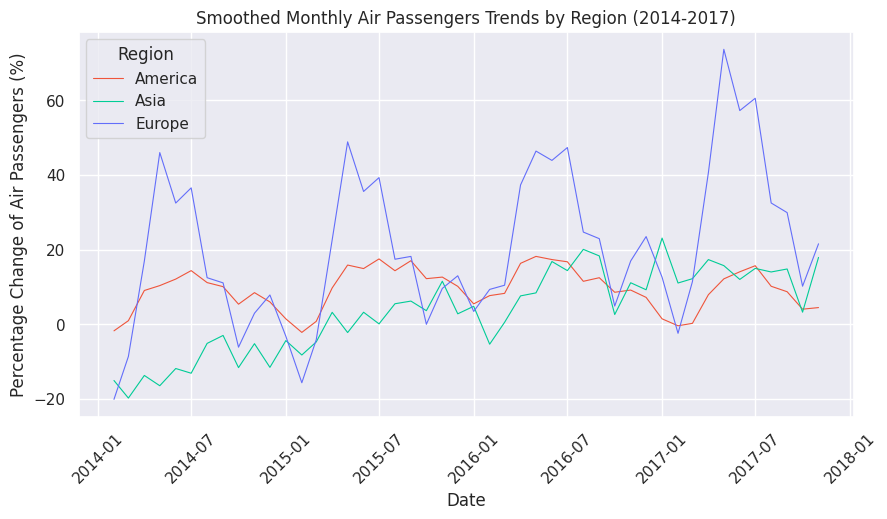

In [121]:

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y ='pct_change_smooth', hue='Region', data= df_plot1, linewidth = 0.8, palette= ['#EF553B', '#00CC96', '#636EFA'])
plt.title("Smoothed Monthly Air Passengers Trends by Region (2014-2017)")
plt.xlabel('Date')
plt.ylabel('Percentage Change of Air Passengers (%)')
plt.xticks(rotation =45)
plt.show()

Plot 1 shows the smoothed percentage change in air passengers from 2014 to 2017 across different regions. Europe experiences a sharp increase in air passengers from February to July, rising from around 40% in July 2014 to about 60% in July 2017. Outside the peak months, growth is more moderate, reflecting a strong seasonal pattern possibly driven by tourism and summer holidays. In contrast, Asia shows smaller month-to-month fluctuations but demonstrates a more consistent overall increase throughout the period. While peak months do see growth, the trend in Asia is steadier, suggesting sustained expansion in air travel rather than spikes tied to specific seasons. America, meanwhile, fluctuates around 20% throughout the period relative to January 2014, no noticeable growth pattern was observed.
This trend in Europe is possibly influenced by European culture, where time off is more systematically built into their calendars. People in Europe tend to have more paid vacation and company-wide summer breaks, making them more likely to travel during peak months. In contrast, Americans often have tighter schedules with fewer leaves, and they tend to save their time off for major family events rather than regular vacations (Boo & Maddie, 2025).

## Plot 2: Relationship Between Air Passenger Volume and Holiday Count Across Regions (2014–2017)

/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:598: UserWarning:

sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



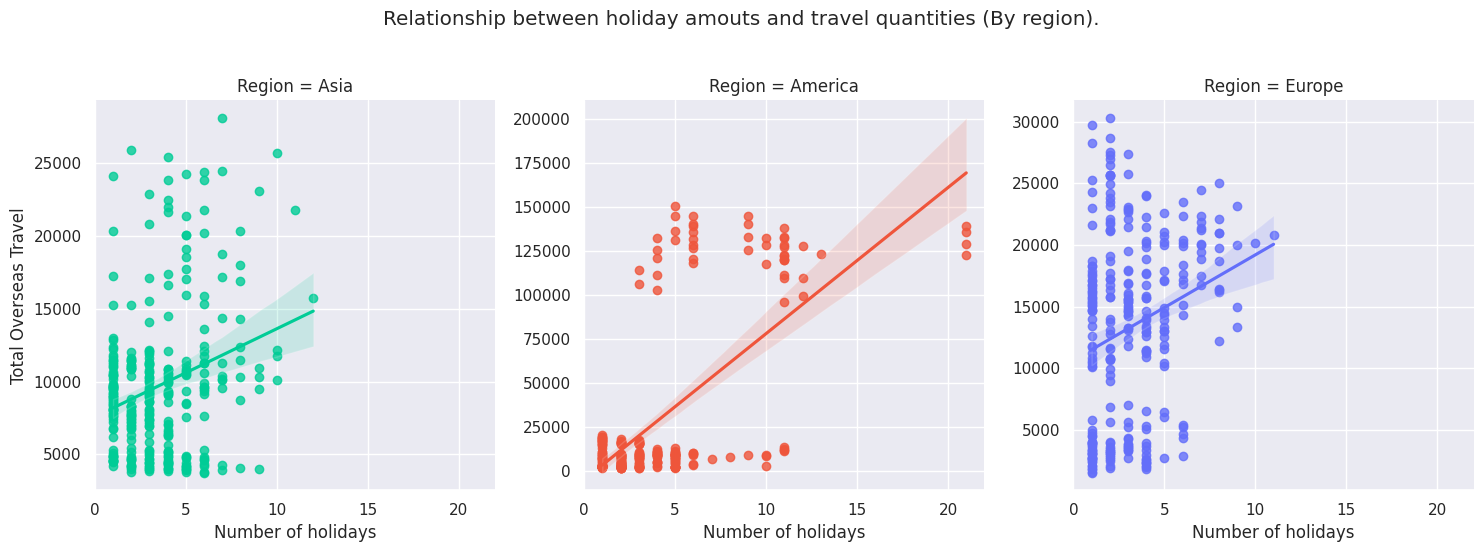

In [122]:
sns.set_theme(style='darkgrid')
palette_dict = {
    'Europe': '#636EFA',
    'Asia': '#00CC96',
    'America': '#EF553B',

}
plot = sns.lmplot(df_clean_final, x = 'HolidayCount', y = 'Total_OS', col = 'Region', hue = 'Region', sharey = False, palette=palette_dict)
plot.set_axis_labels("Number of holidays", "Total Overseas Travel")
plt.suptitle('Relationship between holiday amouts and travel quantities (By region).', y = 1.1)
plt.show()

The relationship between air passenger volume and holiday count across regions shows a generally positive correlation. America exhibits the strongest positive relationship, followed by Europe, indicating that air travel tends to increase during periods with more holidays. However, the overall correlation between the number of holidays and air passenger volume is relatively weak, suggesting that other factors other than holidays also play a significant role in influencing air travel.

## Plot 3: Comparing Air Travel Growth and The Number of Holiday by Region

In [123]:
monthly_average = df_clean_final.groupby(['Region','Month'])[['HolidayCount','Total_OS']].mean().reset_index()
monthly_average = monthly_average.sort_values(['Region','Month'])
monthly_average.head()

,Region,Month,HolidayCount,Total_OS
0,America,1,2.040000,24574.987536
1,America,2,6.764706,31247.194291
2,America,3,3.421053,33378.329409
3,America,4,5.041667,26873.363808
4,America,5,6.250000,28157.196020


In [124]:
monthly_average = monthly_average.sort_values(['Region','Month'])
first_month = monthly_average.groupby(['Region']).first()
first_month=first_month.rename(columns={'Total_OS':'base'}).reset_index()
first_month

,Region,Month,HolidayCount,base
0,America,1,2.04,24574.987536
1,Asia,1,4.00,9436.420630
2,Europe,1,2.25,9059.838375


In [125]:
df = monthly_average.merge(first_month, on= 'Region', how='left')
df.drop(columns=['Month_y', 'HolidayCount_y'], inplace=True)
df=df.rename(columns={'Month_x':'Month', 'HolidayCount_x':'Holiday_Count'})
df.head()
df['growth_index']=(df['Total_OS']/df['base'])*100
df.head(5)

,Region,Month,Holiday_Count,Total_OS,base,growth_index
0,America,1,2.040000,24574.987536,24574.987536,100.000000
1,America,2,6.764706,31247.194291,24574.987536,127.150397
2,America,3,3.421053,33378.329409,24574.987536,135.822366
3,America,4,5.041667,26873.363808,24574.987536,109.352502
4,America,5,6.250000,28157.196020,24574.987536,114.576644


In [127]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

custom_colors = ['#EF553B', '#00CC96', '#636EFA']
regions = df['Region'].unique()

# plot the graph
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=regions,
    specs=[[{"secondary_y": True}]*3],
    shared_yaxes=True
)

for i, region in enumerate(regions):
    df_region = df[df['Region'] == region]

    fig.add_trace(
        go.Bar(
            x=df_region['Month'],
            y=df_region['Holiday_Count'],
            name=f'{region} Holidays',
            marker_color='#AEC6CF',
            opacity=0.5
        ),
        row=1, col=i+1, secondary_y=True
    )


    fig.add_trace(
        go.Scatter(
            x=df_region['Month'],
            y=df_region['growth_index'],
            mode='lines+markers',
            name=f'{region} Air Travel',
            line=dict(color=custom_colors[i], width=3),
            marker=dict(size=6, opacity=0.7)
        ),
        row=1, col=i+1, secondary_y=False
    )



# update layout
fig.update_layout(
    height=400, width=1600,
    title={
        'text': 'Air Travel Growth and Number of Holidays by Region',
        'x': 0.45,   # centers the title
        'xanchor': 'center',
        'font': {
            'size': 25
        }
    },
    plot_bgcolor='#f0f0f0',
    barmode='overlay',
    showlegend=True
)

# update axis titles
for i in range(4):
    fig.update_xaxes(title_text='Month', row=1, col=i+1)
    fig.update_yaxes(title_text='Air Passenger Index (Base = 100)', row=1, col=i+1 , secondary_y=False)
    fig.update_yaxes(title_text='Number of Holidays', row=1, col=i+1, secondary_y=True)

fig.show()

The linear line graph above shows the relative change of air passengers for respective region. The smooth and continuous line can also easily detect seasonal fluctuations (annual peaks and dips), which provides additional insights. Growth index is also used instead of the original number of passengers as the data point, the data of all regions are normalized, starting with the same baseline. In this context, base=100 is used because it simplifies calculation and comparison. Although there are differences in total passenger traffic volume across regions, this allows for clearer, fairer comparison of their growth trends.

By comparing the line plot with the bar chart showing the relative number of holidays for each month, we can observe a slight relationship, particularly in America and Europe. In America, the increase in holidays from January to February corresponds to a sharp rise in air passenger numbers. Similarly, in Europe, the gradual increase in holidays from February to June aligns with an overall growth in air travel. In contrast, Asia shows minimal growth in air passengers across the months, with no clear correlation to the number of holidays. The contrast between the increase in air passengers in July and the decreasing number of holidays in both America and Europe could be explained by the annual school summer break, which is not captured in our dataset.
The relatively stable air passenger numbers in Asia may be due to the availability of alternative travel options besides air travel. For example, Japan's Shinkansen bullet train is one of the world’s fastest, safest, and most efficient rail systems, while China is developing the world's largest high-speed rail network (Shaikh, 2025). Thus, The availability of additional travel options may reduce the direct impact of public holidays on air travel, making changes in air passenger numbers less significant.

# Conclusion
In summary, the three plots reveal that Europe demonstrates the greatest overall variability in air travel, while America displays the strongest association between air travel and holiday frequency. Europe’s sharp seasonal peaks in Plot 1 suggest that its growth in air travel may be driven by holiday periods, and this possible relationship is further reflected in Plot 3. For America, the consistent positive relationship with holiday count in Plot 2 indicates that public holidays may have a measurable influence on air travel demand. However, Asia shows a steady trend in air travel growth in both Plot 1 and Plot 3, suggesting that holiday count is not the sole or primary factor influencing air travel in this region.

Overall, while holiday counts play a noticeable role in driving air travel, particularly in Europe and America, but it only partially explains the observed growth patterns across regions. Broader factors such as weather conditions, seasonal travel preferences, cultural influences, and economic conditions may also significantly affect air travel patterns but were not included in this investigation, and thus represent a limitation of the study.

# Teamwork

Overall, there are no issues with team work with each member contributing to the project.

- Eu Leong: Data Cleaning, plot 2 and write-up
- Chen Yan: Plots 1,3 and write-up
- Jianan: Plot 3 and write-up
- Ryan: Ideas and write-up

# References
Boo & Maddie. (2025, November 6). *How Europeans and Americans travel differently*. https://www.booandmaddie.com/how-europeans-and-americans-travel-differently/

Rfordatascience. (2024, December 24). tidytuesday/data/2024/2024-12-24/readme.md at main · rfordatascience/tidytuesday. GitHub. https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-12-24/readme.md

Shaikh, K. (2025, September 15). *Maglev momentum: Why Asia speeds ahead while Western high-speed projects derail.* Interesting Engineering. https://interestingengineering.com/culture/maglev-trains-and-how-asia-raced-ahead